In [236]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.

algo_returns.csv: Contains returns from the in-house trading algorithms from Harold's company.

sp500_history.csv: Contains historical closing prices of the S&P 500 Index.

#Whale Returns

Read the Whale Portfolio daily returns and clean the data

# Reading whale returns

In [237]:
csv_path = Path('whale_returns.csv')
whale_returns = pd.read_csv(csv_path)
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [238]:
# Count nulls
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [239]:
# Drop nulls
whale_returns = whale_returns.dropna()

In [240]:
# Count nulls
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [241]:
whale_returns = whale_returns.sort_values(by=['Date'], ascending=False)
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1059,2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
...,...,...,...,...,...
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213


In [242]:
whale_returns['Date'] = whale_returns['Date'].astype("datetime64")

In [243]:
whale_returns.set_index('Date')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
...,...,...,...,...
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,0.004016,0.004076,0.002355,0.006726


# Reading algorithmic returns

In [244]:
csv_path = Path('algo_returns.csv')
algo_returns = pd.read_csv(csv_path)
algo_returns

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [245]:
# Count nulls
algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [246]:
# Drop nulls
algo_returns = algo_returns.dropna()

In [247]:
# Count nulls
algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [248]:
algo_returns = algo_returns.sort_values(by=['Date'], ascending=False)
algo_returns

,Date,Algo 1,Algo 2
1240,2019-05-01,0.000094,-0.007358
1239,2019-04-30,-0.002944,-0.001570
1238,2019-04-29,0.005208,0.002829
1237,2019-04-26,0.002981,0.005256
1236,2019-04-25,0.000682,-0.007247
...,...,...,...
10,2014-06-11,0.004760,-0.003761
9,2014-06-10,0.004406,-0.000735
8,2014-06-09,-0.005012,0.005668
7,2014-06-06,0.001857,0.008284


In [249]:
algo_returns.set_index('Date')

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247
...,...,...
2014-06-11,0.004760,-0.003761
2014-06-10,0.004406,-0.000735
2014-06-09,-0.005012,0.005668


In [250]:
algo_returns['Date'] = algo_returns['Date'].astype("datetime64")

# Reading S&P 500 Closing Prices

In [251]:
csv_path = Path('sp500_history.csv')
sp500_history = pd.read_csv(csv_path)
sp500_history

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [252]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [253]:
sp500_history['Close'] = sp500_history['Close'].str.replace(',', '')
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype("float")

In [254]:
sp500_history['Date'] = sp500_history['Date'].astype("datetime64")
sp500_history

,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06
...,...,...
1644,2012-10-05,1460.93
1645,2012-10-04,1461.40
1646,2012-10-03,1450.99
1647,2012-10-02,1445.75


In [255]:
# Calculate Daily Returns
prices = sp500_history["Close"]
daily_return = prices.pct_change(1)
sp500_history ['daily_return']= daily_return
sp500_history

,Date,Close,daily_return
0,2019-04-23,2933.68,NaN
1,2019-04-22,2907.97,-0.008764
2,2019-04-18,2905.03,-0.001011
3,2019-04-17,2900.45,-0.001577
4,2019-04-16,2907.06,0.002279
...,...,...,...
1644,2012-10-05,1460.93,0.003469
1645,2012-10-04,1461.40,0.000322
1646,2012-10-03,1450.99,-0.007123
1647,2012-10-02,1445.75,-0.003611


In [256]:
# Count nulls
sp500_history.isnull().mean() * 100
sp500_history.isnull().sum()

Date            0
Close           0
daily_return    1
dtype: int64

In [257]:
# Drop nulls
sp500_history = sp500_history.dropna()

In [258]:
# Count nulls
sp500_history.isnull().mean() * 100
sp500_history.isnull().sum()

Date            0
Close           0
daily_return    0
dtype: int64

In [259]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.columns = ['Date','S&P_500_Close', 'S&P_500_Daily_Return']
sp500_history

,Date,S&P_500_Close,S&P_500_Daily_Return
1,2019-04-22,2907.97,-0.008764
2,2019-04-18,2905.03,-0.001011
3,2019-04-17,2900.45,-0.001577
4,2019-04-16,2907.06,0.002279
5,2019-04-15,2905.58,-0.000509
...,...,...,...
1644,2012-10-05,1460.93,0.003469
1645,2012-10-04,1461.40,0.000322
1646,2012-10-03,1450.99,-0.007123
1647,2012-10-02,1445.75,-0.003611


In [260]:
sp500_history = sp500_history.sort_values(by=['Date'], ascending=False)
sp500_history

,Date,S&P_500_Close,S&P_500_Daily_Return
1,2019-04-22,2907.97,-0.008764
2,2019-04-18,2905.03,-0.001011
3,2019-04-17,2900.45,-0.001577
4,2019-04-16,2907.06,0.002279
5,2019-04-15,2905.58,-0.000509
...,...,...,...
1644,2012-10-05,1460.93,0.003469
1645,2012-10-04,1461.40,0.000322
1646,2012-10-03,1450.99,-0.007123
1647,2012-10-02,1445.75,-0.003611


In [261]:
sp500_history.set_index('Date')

,S&P_500_Close,S&P_500_Daily_Return
Date,,
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
2019-04-15,2905.58,-0.000509
...,...,...
2012-10-05,1460.93,0.003469
2012-10-04,1461.40,0.000322
2012-10-03,1450.99,-0.007123


# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

In [262]:
concat_df2 = pd.merge(whale_returns, algo_returns, how='inner', on='Date')
concat_df2

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
0,2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358
1,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570
2,2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829
3,2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256
4,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247
...,...,...,...,...,...,...,...
1044,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
1045,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
1046,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
1047,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416


In [263]:
concat_df = pd.merge(concat_df2, sp500_history, how='inner', on='Date')
concat_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Close,S&P_500_Daily_Return
0,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,2907.97,-0.008764
1,2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03,-0.001011
2,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45,-0.001577
3,2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06,0.002279
4,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,2905.58,-0.000509
...,...,...,...,...,...,...,...,...,...
1037,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43,0.017254
1038,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26,-0.003929
1039,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04,0.014378
1040,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53,-0.001195


In [264]:
concat_df.drop(columns=['S&P_500_Close'], inplace=True)
concat_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Daily_Return
0,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
1,2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
3,2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
4,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...,...
1037,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
1038,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
1039,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
1040,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195


In [265]:
concat_df.set_index('Date')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Daily_Return
Date,,,,,,,
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

### Calculate and Plot the daily returns.

In [266]:
# Plot daily returns of all portfolios

<AxesSubplot:xlabel='Date'>

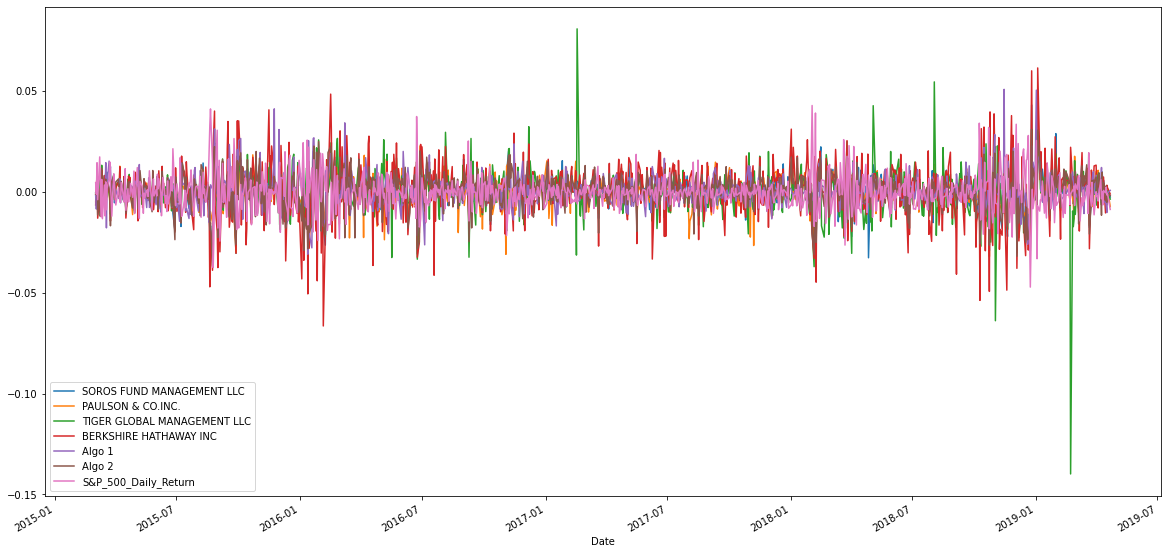

In [267]:
# Daily returns plot for all portfolios
concat_df.plot(kind='line', x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

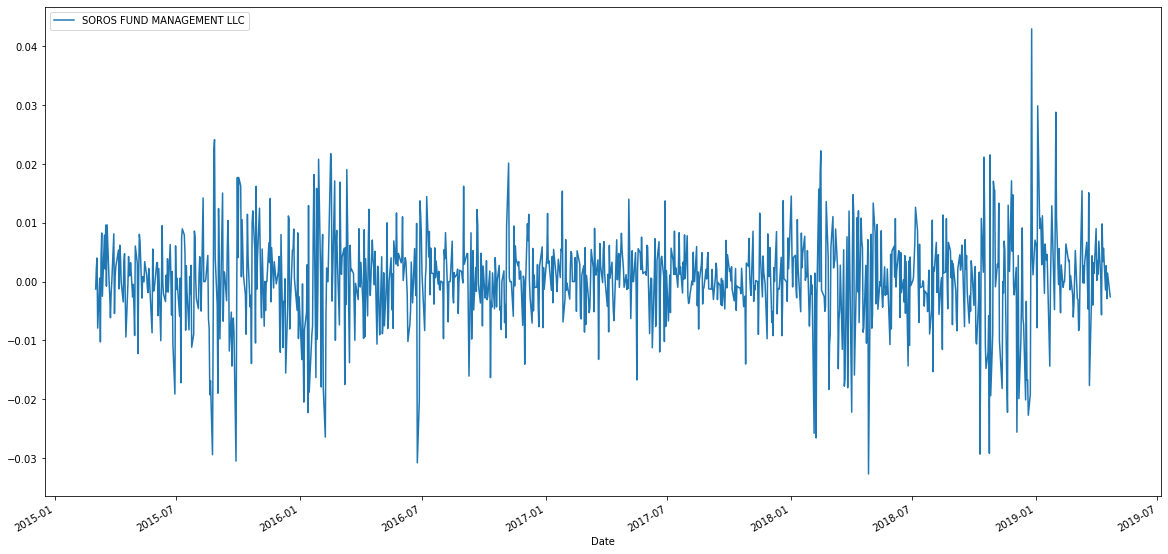

In [268]:
# Daily return plot of the SOROS FUND MANAGEMENT LLC portfolio
concat_df[['SOROS FUND MANAGEMENT LLC','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

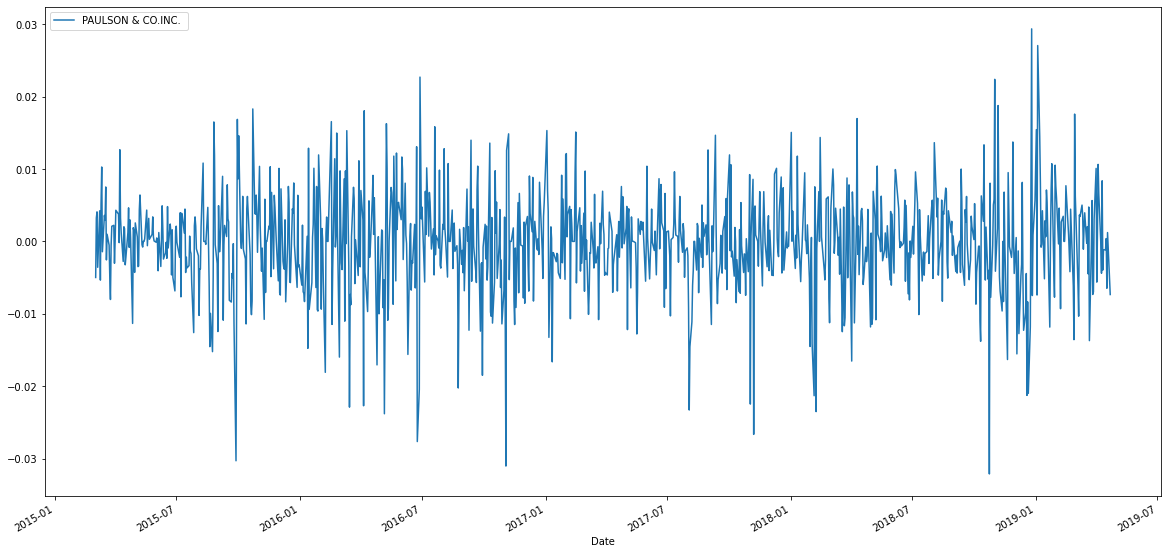

In [269]:
# Daily return plot of the PAULSON & CO.INC. portfolio
concat_df[['PAULSON & CO.INC. ','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

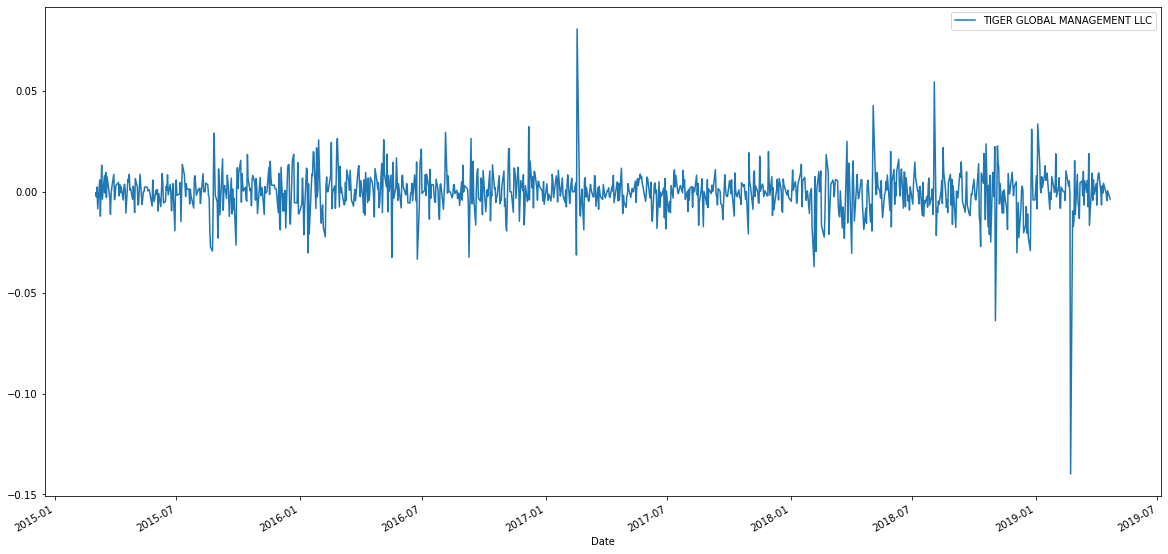

In [270]:
# Daily return plot of the TIGER GLOBAL MANAGEMENT LLC portfolio
concat_df[['TIGER GLOBAL MANAGEMENT LLC','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

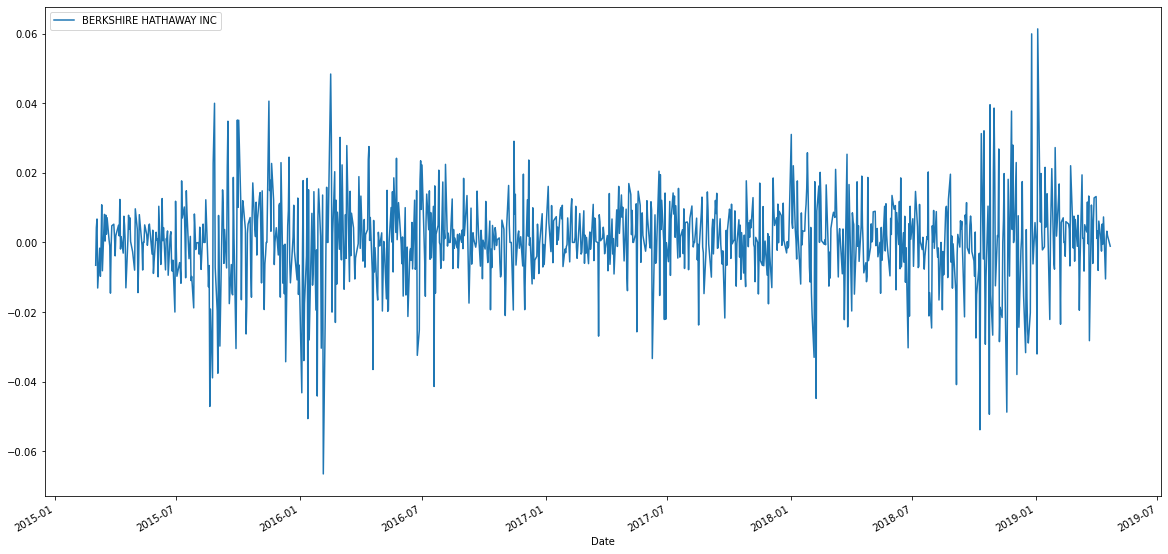

In [271]:
# Daily return plot of the BERKSHIRE HATHAWAY INC portfolio
concat_df[['BERKSHIRE HATHAWAY INC','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

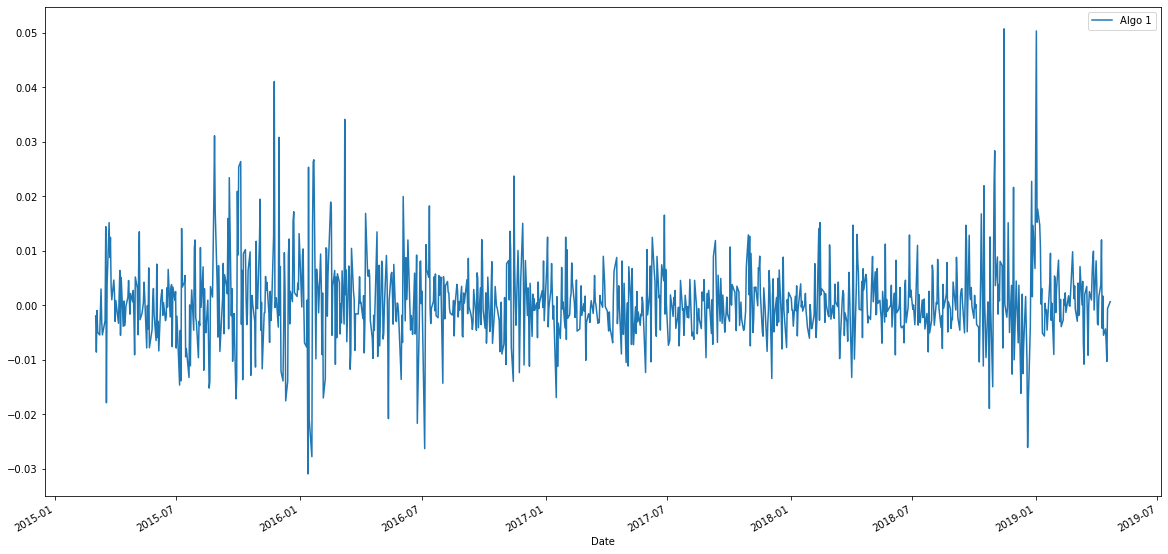

In [272]:
# Daily return plot of the Algo 1 portfolio
concat_df[['Algo 1','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

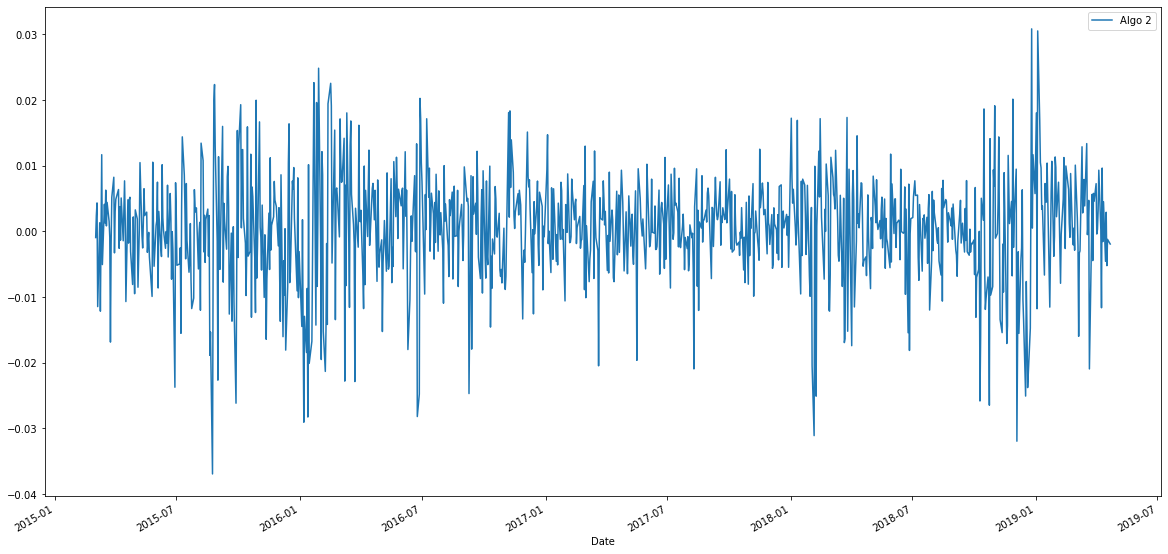

In [273]:
# Daily return plot of the Algo 2 portfolio
concat_df[['Algo 2','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

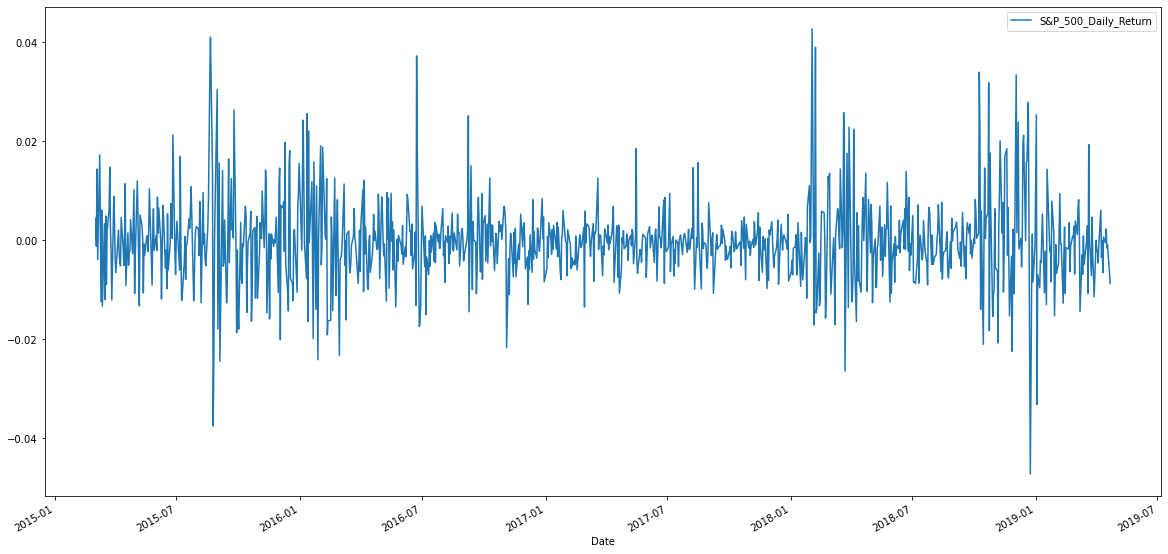

In [274]:
# Daily return plot of the S&P_500 portfolio
concat_df[['S&P_500_Daily_Return','Date']].plot(x='Date', figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [275]:
# Calculate cumulative returns of all portfolios

In [276]:
# SOROS FUND MANAGEMENT LLC portfolio cumulative return
soros_cum_return=()
soros_cum_return=concat_df["SOROS FUND MANAGEMENT LLC"].sum()
soros_cum_return

0.17772326953239803

In [277]:
# PAULSON & CO.INC. LLC portfolio cumulative return
paulson_cum_return=()
paulson_cum_return=concat_df["PAULSON & CO.INC. "].sum()
paulson_cum_return

-0.22662120902335225

In [278]:
# TIGER GLOBAL MANAGEMENT LLC portfolio cumulative return
tiger_cum_return=()
tiger_cum_return=concat_df["TIGER GLOBAL MANAGEMENT LLC"].sum()
tiger_cum_return

-0.09312193396550372

In [279]:
# BERKSHIRE HATHAWAY INC portfolio cumulative return
berkshire_cum_return=()
berkshire_cum_return=concat_df["BERKSHIRE HATHAWAY INC"].sum()
berkshire_cum_return

0.5145084271332625

In [280]:
# Algo 1 portfolio cumulative return
algo1_cum_return=()
algo1_cum_return=concat_df["Algo 1"].sum()
algo1_cum_return

0.68527677123948

In [281]:
# Algo 2 portfolio cumulative return
algo2_cum_return=()
algo2_cum_return=concat_df["Algo 2"].sum()
algo2_cum_return

0.2651813640329055

In [282]:
# S&P 500 portfolio cumulative return
sp500_cum_return=()
sp500_cum_return=concat_df["S&P_500_Daily_Return"].sum()
sp500_cum_return

-0.29229468655047464

In [283]:
# Plot cumulative returns

In [284]:
data = [['Soro', soros_cum_return],['Paulson', paulson_cum_return], ['Tiger', tiger_cum_return], ['Berkshire', berkshire_cum_return], ['Algo1', algo1_cum_return], ['Algo2', algo2_cum_return], ['S&P', sp500_cum_return]]

In [285]:
pcr_df = pd.DataFrame(data, columns = ['Portfolio', 'Return'])
pcr_df

,Portfolio,Return
0,Soro,0.177723
1,Paulson,-0.226621
2,Tiger,-0.093122
3,Berkshire,0.514508
4,Algo1,0.685277
5,Algo2,0.265181
6,S&P,-0.292295


<AxesSubplot:title={'center':'Cumulative Returns of each portfolio'}, xlabel='Portfolio'>

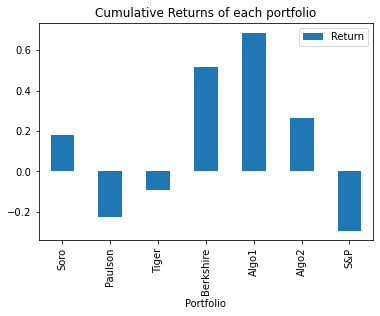

In [286]:
pcr_df.plot(x='Portfolio', kind='bar', title="Cumulative Returns of each portfolio")

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio

In [287]:
# Box plot to visually show risk

<AxesSubplot:title={'center':'Box plot for each portfolio'}>

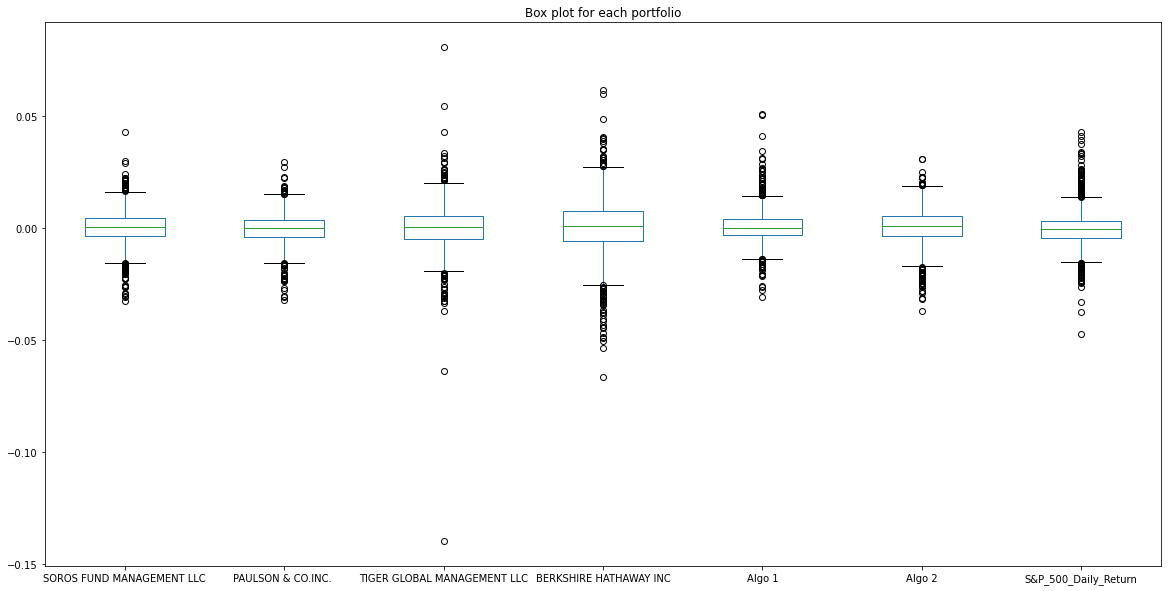

In [288]:
concat_df.plot(kind='box', figsize=(20,10), title="Box plot for each portfolio")

### Calculate Standard Deviations


In [289]:
concat_df.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Daily_Return
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,0.000171,-0.000217,-0.000089,0.000494,0.000658,0.000254,-0.000281
std,0.007896,0.007026,0.010897,0.012919,0.007623,0.008341,0.008587
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.047250
25%,-0.003641,-0.004044,-0.004792,-0.005655,-0.003257,-0.003799,-0.004456
50%,0.000517,0.000000,0.000313,0.000726,0.000069,0.000698,-0.000450
75%,0.004320,0.003629,0.005233,0.007565,0.003874,0.005226,0.002881
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.042730


In [290]:
# Daily standard deviation of the SOROS FUND MANAGEMENT LLC portfolio
Soro_Daily_std=concat_df['SOROS FUND MANAGEMENT LLC'].std()
Soro_Daily_std

0.007896188745252384

In [291]:
# Daily standard deviation of the PAULSON & CO. INC. portfolio
Paul_Daily_std=concat_df['PAULSON & CO.INC. '].std()
Paul_Daily_std

0.0070255154276058045

In [292]:
# Daily standard deviation of the TIGER GLOBAL MANAGEMENT LLC portfolio
Tiger_Daily_std=concat_df['TIGER GLOBAL MANAGEMENT LLC'].std()
Tiger_Daily_std

0.01089730541458339

In [293]:
# Daily standard deviation of the BERKSHIRE HATHAWAY INC. portfolio
Berkshire_Daily_std=concat_df['BERKSHIRE HATHAWAY INC'].std()
Berkshire_Daily_std

0.012918753062201832

In [294]:
# Daily standard deviation of the ALGO 1 portfolio
Algo1_Daily_std=concat_df['Algo 1'].std()
Algo1_Daily_std

0.007622690854822084

In [295]:
# Daily standard deviation of the ALGO 2 portfolio
Algo1_Daily_std=concat_df['Algo 2'].std()
Algo1_Daily_std

0.008341234467834753

### Determine which portfolios are riskier than the S&P 500

In [296]:
# Daily standard deviation of the S&P 500 portfolio
concat_df['S&P_500_Daily_Return'].std()

0.008586889747073993

In [297]:
# Determine which portfolios are riskier than the S&P 500

In [298]:
riskyness = concat_df.std() * np.sqrt(252)
riskyness.sort_values(inplace=True)
riskyness

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P_500_Daily_Return           0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

##### Tiger Global Management & Bershire Hathaway are the only portfolios that are less risky than the S&P 500

In [299]:
Soro_covariance = concat_df['SOROS FUND MANAGEMENT LLC'].cov(concat_df['S&P_500_Daily_Return'])
Soro_covariance

3.8897269830640045e-08

In [300]:
Soro_variance = concat_df['SOROS FUND MANAGEMENT LLC'].var()
Soro_variance

6.234979670065043e-05

In [301]:
Paul_covariance = concat_df['PAULSON & CO.INC. '].cov(concat_df['S&P_500_Daily_Return'])
Paul_covariance

8.173659005663528e-07

In [302]:
Paul_variance = concat_df['PAULSON & CO.INC. '].var()
Paul_variance

4.9357867023527174e-05

In [303]:
Tiger_covariance = concat_df['TIGER GLOBAL MANAGEMENT LLC'].cov(concat_df['S&P_500_Daily_Return'])
Tiger_covariance

-1.408113127181813e-07

In [304]:
Tiger_variance = concat_df['TIGER GLOBAL MANAGEMENT LLC'].var()
Tiger_variance

0.00011875126529870846

In [305]:
Berkshire_covariance = concat_df['BERKSHIRE HATHAWAY INC'].cov(concat_df['S&P_500_Daily_Return'])
Berkshire_covariance

-1.5371091324717569e-06

In [306]:
Berkshire_variance = concat_df['BERKSHIRE HATHAWAY INC'].var()
Berkshire_variance

0.00016689418068214923

In [307]:
Algo1_covariance = concat_df['Algo 1'].cov(concat_df['S&P_500_Daily_Return'])
Algo1_covariance

-2.223042551715527e-06

In [308]:
Algo1_variance = concat_df['Algo 1'].var()
Algo1_variance

5.8105415868188234e-05

In [309]:
Algo2_covariance = concat_df['Algo 2'].cov(concat_df['S&P_500_Daily_Return'])
Algo2_covariance

-1.5699865363009675e-07

In [310]:
Algo2_variance = concat_df['Algo 2'].var()
Algo2_variance

6.957619244739451e-05

In [311]:
# Beta of the SOROS FUND MANAGEMENT LLC portfolio
Soro_beta = Soro_covariance / Soro_variance
Soro_beta

0.0006238556000012469

In [312]:
# Beta of the PAULSON & CO.INC. portfolio
Paul_beta = Paul_covariance / Paul_variance
Paul_beta

0.01655999235495211

In [313]:
# Beta of the TIGER GLOBAL MANAGEMENT LLC portfolio
Tiger_beta = Tiger_covariance / Tiger_variance
Tiger_beta

-0.0011857668410015063

In [314]:
# Beta of the BERKSHIRE HATHAWAY INC portfolio
Berkshire_beta = Berkshire_covariance / Berkshire_variance
Berkshire_beta

-0.009210082258045824

In [315]:
# Beta of the Algo 1 portfolio
Algo1_beta = Algo1_covariance / Algo1_variance
Algo1_beta

-0.03825878394465818

In [316]:
# Beta of the Algo 2 portfolio
Algo2_beta = Algo2_covariance / Algo2_variance
Algo2_beta

-0.0022564996460362648

### Calculate the Annualized Standard Deviation

In [317]:
# Calculate the annualized standard deviation (252 trading days)

In [318]:
ann_stdv=concat_df.std()*np.sqrt(252)
ann_stdv

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P_500_Daily_Return           0.136313
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [319]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
concat_df.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Daily_Return
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1037,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008687
1038,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.008711
1039,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009260
1040,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009128


<AxesSubplot:title={'center':'Rollong 21 day STDV for each portfolio'}>

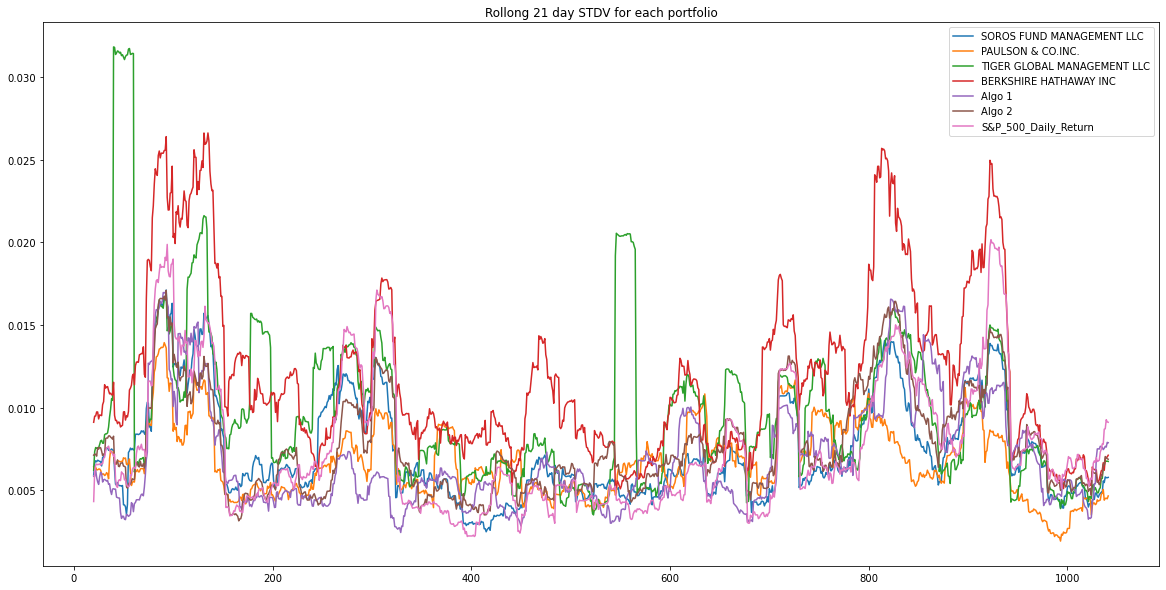

In [320]:
# Plot the rolling standard deviation
concat_df.rolling(window=21).std().plot(figsize=(20,10), title="Rollong 21 day STDV for each portfolio")

### Calculate and plot the correlation

In [321]:
# Calculate the correlation

In [322]:
all_correlation = concat_df.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Daily_Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P_500_Daily_Return,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

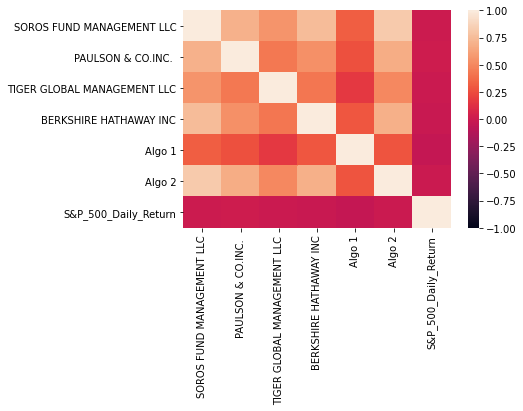

In [323]:
# Display de correlation matrix
sns.heatmap(all_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [324]:
# Calculate covariance of a single portfolio

In [325]:
Soro_covariance

3.8897269830640045e-08

In [326]:
Paul_covariance

8.173659005663528e-07

In [327]:
Tiger_covariance

-1.408113127181813e-07

In [328]:
Berkshire_covariance

-1.5371091324717569e-06

In [329]:
Algo1_covariance

-2.223042551715527e-06

In [330]:
Algo2_covariance

-1.5699865363009675e-07

In [331]:
# Calculate variance of S&P 500

In [332]:
SP_variance = concat_df['S&P_500_Daily_Return'].var()
SP_variance

7.373467552840446e-05

In [333]:
# Computing beta

In [334]:
Soro_beta

0.0006238556000012469

In [335]:
Paul_beta

0.01655999235495211

In [336]:
Tiger_beta

-0.0011857668410015063

In [337]:
Berkshire_beta

-0.009210082258045824

In [338]:
Algo1_beta

-0.03825878394465818

In [339]:
Algo2_beta

-0.0022564996460362648

In [340]:
Soro_rolling_cov = concat_df['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(concat_df['S&P_500_Daily_Return'])

In [341]:
Paul_rolling_cov = concat_df['PAULSON & CO.INC. '].rolling(window=30).cov(concat_df['S&P_500_Daily_Return'])

In [342]:
Tiger_rolling_cov = concat_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(concat_df['S&P_500_Daily_Return'])

In [343]:
Berkshire_rolling_cov = concat_df['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(concat_df['S&P_500_Daily_Return'])

In [344]:
Algo1_rolling_cov = concat_df['Algo 1'].rolling(window=30).cov(concat_df['S&P_500_Daily_Return'])

In [345]:
Algo2_rolling_cov = concat_df['Algo 2'].rolling(window=30).cov(concat_df['S&P_500_Daily_Return'])

In [346]:
Soro_rolling_variance = concat_df['SOROS FUND MANAGEMENT LLC'].rolling(window=30).var()

In [347]:
Paul_rolling_variance = concat_df['PAULSON & CO.INC. '].rolling(window=30).var()

In [348]:
Tiger_rolling_variance = concat_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).var()

In [349]:
Berkshire_rolling_variance = concat_df['BERKSHIRE HATHAWAY INC'].rolling(window=30).var()

In [350]:
Algo1_rolling_variance = concat_df['Algo 1'].rolling(window=30).var()

In [351]:
Algo2_rolling_variance = concat_df['Algo 2'].rolling(window=30).var()

In [352]:
# Plot beta trend

<AxesSubplot:title={'center':'Rolling 30-Day Beta of SOROS FUND MANAGEMENT LLC'}>

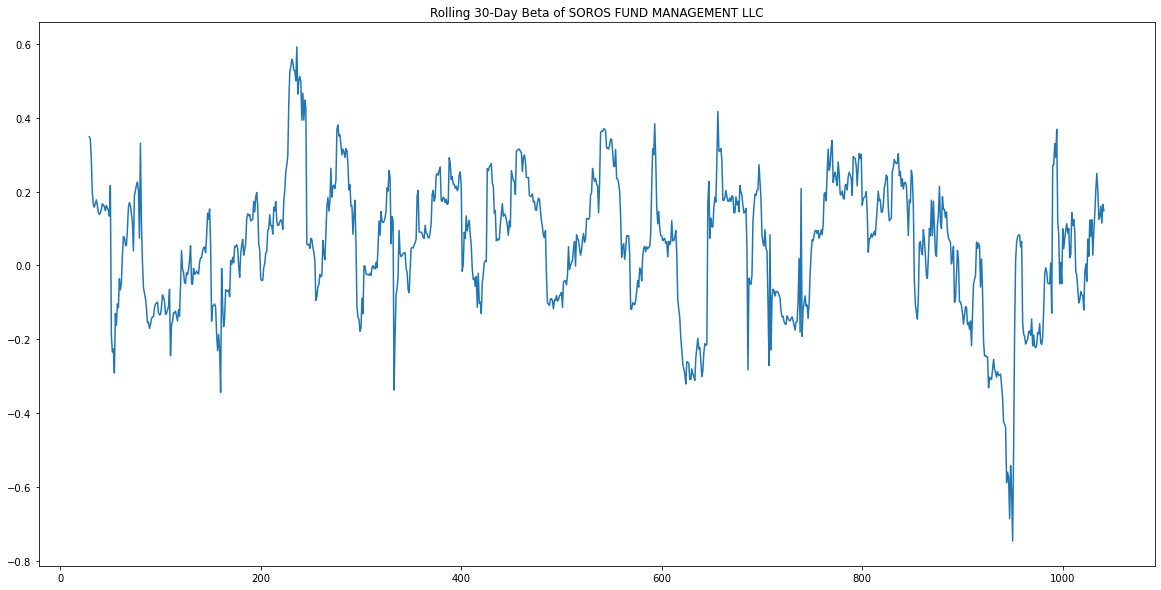

In [353]:
Soro_rolling_beta = Soro_rolling_cov / Soro_rolling_variance
Soro_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of SOROS FUND MANAGEMENT LLC')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of PAULSON & CO.INC.'}>

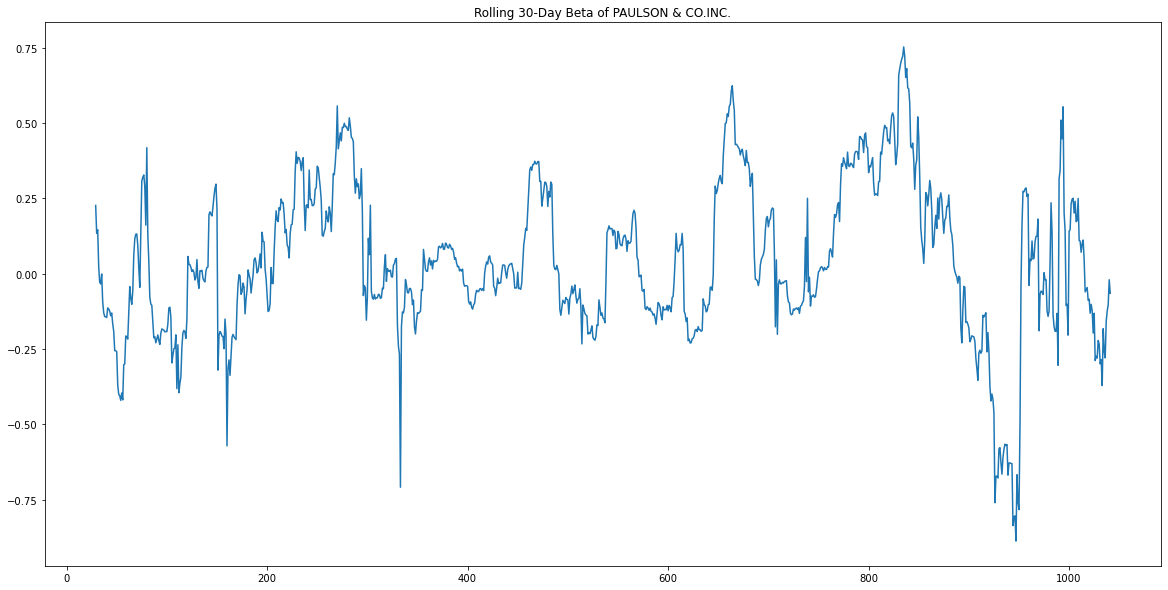

In [354]:
Paul_rolling_beta = Paul_rolling_cov / Paul_rolling_variance
Paul_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of PAULSON & CO.INC.')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of TIGER GLOBAL MANAGEMENT LLC'}>

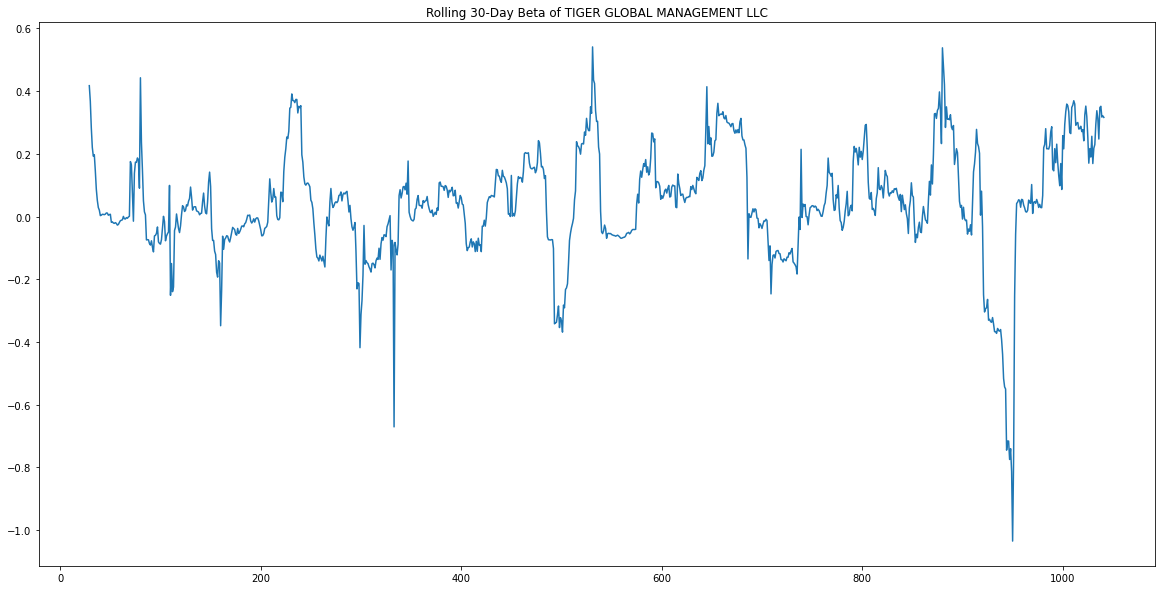

In [355]:
Tiger_rolling_beta = Tiger_rolling_cov / Tiger_rolling_variance
Tiger_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of TIGER GLOBAL MANAGEMENT LLC')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of BERKSHIRE HATHAWAY INC'}>

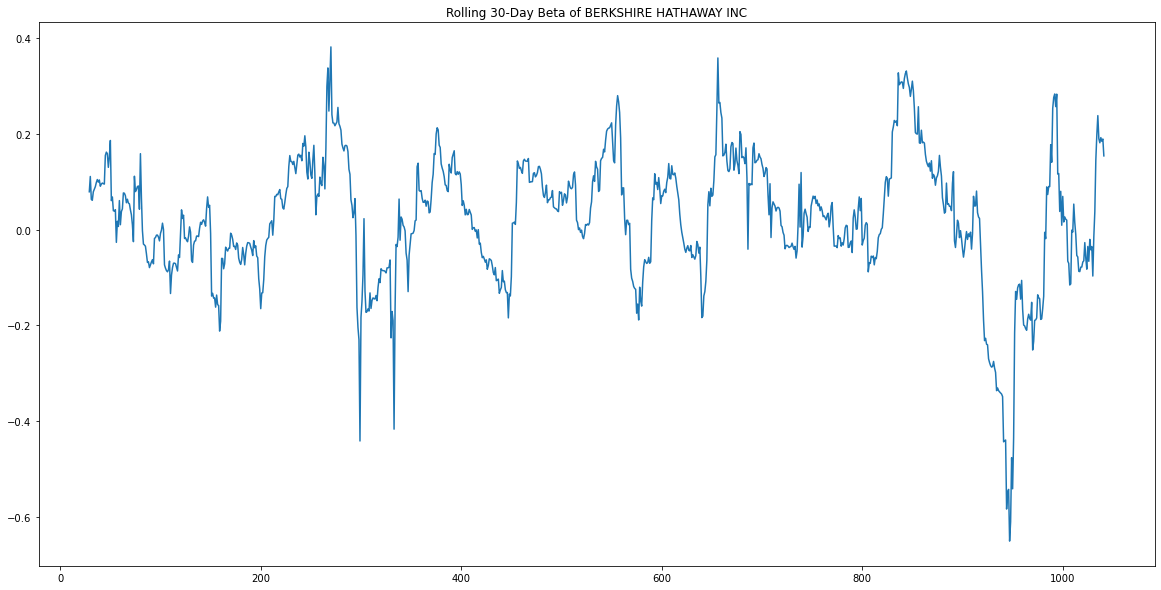

In [356]:
Berkshire_rolling_beta = Berkshire_rolling_cov / Berkshire_rolling_variance
Berkshire_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of BERKSHIRE HATHAWAY INC')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 1'}>

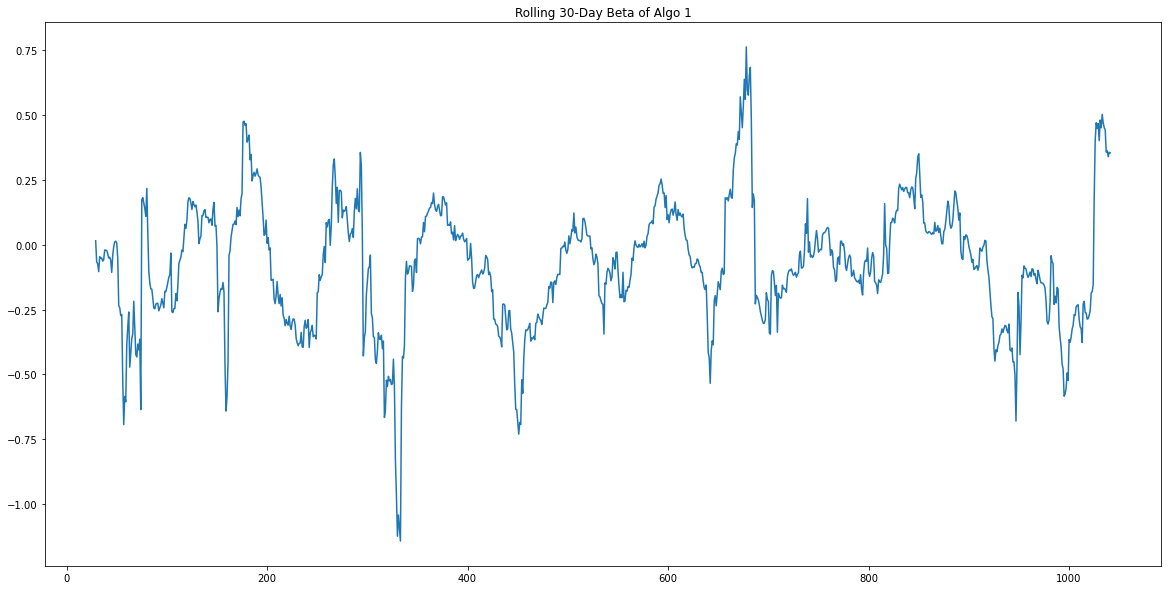

In [357]:
Algo1_rolling_beta = Algo1_rolling_cov / Algo1_rolling_variance
Algo1_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 2'}>

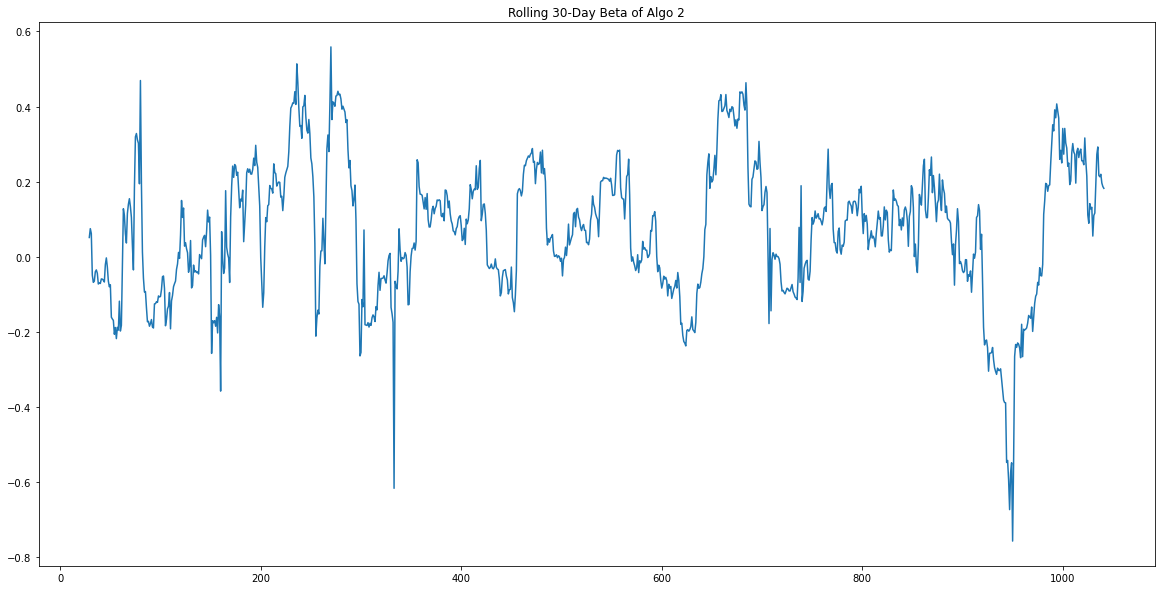

In [358]:
Algo2_rolling_beta = Algo2_rolling_cov / Algo2_rolling_variance
Algo2_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 2')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [359]:
# Use `ewm` to calculate the rolling window

In [360]:
EWM=concat_df.ewm(halflife=21).std()
EWM

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Daily_Return
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002852,0.006049,0.002985,0.002124,0.000894,0.000500,0.005482
2,0.002427,0.004701,0.002695,0.002201,0.006048,0.002154,0.004284
3,0.002845,0.004460,0.002341,0.001805,0.005196,0.003396,0.004613
4,0.002498,0.003920,0.002304,0.005599,0.004463,0.003273,0.004031
...,...,...,...,...,...,...,...
1037,0.005669,0.004448,0.006252,0.007262,0.006658,0.006406,0.008122
1038,0.005783,0.004445,0.006363,0.007540,0.006621,0.006645,0.008019
1039,0.005725,0.004415,0.006269,0.007514,0.006516,0.006583,0.008306
1040,0.005640,0.004365,0.006189,0.007426,0.006602,0.006488,0.008174


# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [361]:
# Annualized Sharpe Ratios

In [362]:
Soro_sharpe=concat_df['SOROS FUND MANAGEMENT LLC'].mean() / concat_df['SOROS FUND MANAGEMENT LLC'].std()
Soro_sharpe=(252**0.5) * Soro_sharpe
Soro_sharpe

0.3428935570381492

In [363]:
Paul_sharpe=concat_df['PAULSON & CO.INC. '].mean() / concat_df['PAULSON & CO.INC. '].std()
Paul_sharpe=(252**0.5) * Paul_sharpe
Paul_sharpe

-0.49142235837057996

In [364]:
Tiger_sharpe=concat_df['TIGER GLOBAL MANAGEMENT LLC'].mean() / concat_df['TIGER GLOBAL MANAGEMENT LLC'].std()
Tiger_sharpe=(252**0.5) * Tiger_sharpe
Tiger_sharpe

-0.13018633934432106

In [365]:
Berkshire_sharpe=concat_df['BERKSHIRE HATHAWAY INC'].mean() / concat_df['BERKSHIRE HATHAWAY INC'].std()
Berkshire_sharpe=(252**0.5) * Berkshire_sharpe
Berkshire_sharpe

0.6067425423251495

In [366]:
Algo1_sharpe=concat_df['Algo 1'].mean() / concat_df['Algo 2'].std()
Algo1_sharpe=(252**0.5) * Algo1_sharpe
Algo1_sharpe

1.251607719579165

In [367]:
Algo2_sharpe=concat_df['Algo 2'].mean() / concat_df['Algo 2'].std()
Algo2_sharpe=(252**0.5) * Algo2_sharpe
Algo2_sharpe

0.4843342956332729

In [368]:
portfolios = {'Soros':0.3428935570381492, 'Paulson':-0.49142235837057996, 'Tiger':-0.13018633934432106, 'Berkshire':0.6067425423251495, 'Algo1':1.251607719579165, 'Algo2':0.4843342956332729}
portfolios_sharpe=pd.DataFrame(portfolios.items(), columns=['Portfolio', 'Sharpe'])
portfolios_sharpe

,Portfolio,Sharpe
0,Soros,0.342894
1,Paulson,-0.491422
2,Tiger,-0.130186
3,Berkshire,0.606743
4,Algo1,1.251608
5,Algo2,0.484334


In [369]:
portfolios_sharpe.set_index('Portfolio')

,Sharpe
Portfolio,
Soros,0.342894
Paulson,-0.491422
Tiger,-0.130186
Berkshire,0.606743
Algo1,1.251608
Algo2,0.484334


<AxesSubplot:xlabel='Portfolio'>

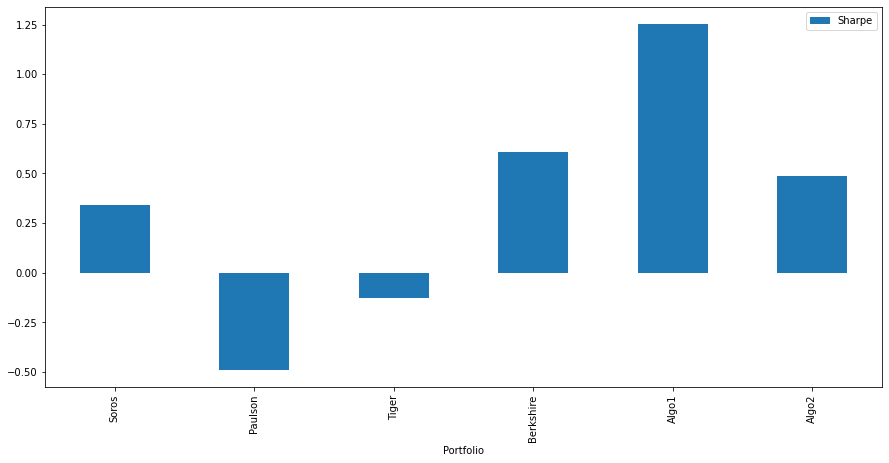

In [370]:
# Visualize the sharpe ratios as a bar plot
portfolios_sharpe.plot(x='Portfolio', kind='bar', figsize=(15,7))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 out performed all portfolios and Algo 2 out performed all portfolios except Berkshire Hathaway

In [371]:
concat_df.sum()

SOROS FUND MANAGEMENT LLC      0.177723
PAULSON & CO.INC.             -0.226621
TIGER GLOBAL MANAGEMENT LLC   -0.093122
BERKSHIRE HATHAWAY INC         0.514508
Algo 1                         0.685277
Algo 2                         0.265181
S&P_500_Daily_Return          -0.292295
dtype: float64

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [372]:
# Reading data from Apple stock
csv_path = Path('aapl_historical.csv')
aapl_returns = pd.read_csv(csv_path)
aapl_returns

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75
...,...,...,...
245,AAPL,5/17/2018,186.99
246,AAPL,5/16/2018,188.18
247,AAPL,5/15/2018,186.44
248,AAPL,5/14/2018,188.15


In [373]:
aapl_returns['Trade DATE'] = aapl_returns['Trade DATE'].astype("datetime64")

In [374]:
aapl_returns.dtypes

Symbol                object
Trade DATE    datetime64[ns]
NOCP                 float64
dtype: object

In [375]:
# Calculate Daily Returns
prices = aapl_returns["NOCP"]
daily_return = prices.pct_change(1)
aapl_returns ['daily_return']= daily_return
aapl_returns

,Symbol,Trade DATE,NOCP,daily_return
0,AAPL,2019-05-09,200.72,NaN
1,AAPL,2019-05-08,202.90,0.010861
2,AAPL,2019-05-07,202.86,-0.000197
3,AAPL,2019-05-06,208.48,0.027704
4,AAPL,2019-05-03,211.75,0.015685
...,...,...,...,...
245,AAPL,2018-05-17,186.99,0.003650
246,AAPL,2018-05-16,188.18,0.006364
247,AAPL,2018-05-15,186.44,-0.009246
248,AAPL,2018-05-14,188.15,0.009172


In [376]:
aapl_returns.drop(columns=['NOCP'], inplace=True)

In [377]:
aapl_returns.drop(columns=['Symbol'], inplace=True)

In [378]:
aapl_returns.columns = ['Trade Date', 'AAPL_Daily_Return']
aapl_returns

,Trade Date,AAPL_Daily_Return
0,2019-05-09,NaN
1,2019-05-08,0.010861
2,2019-05-07,-0.000197
3,2019-05-06,0.027704
4,2019-05-03,0.015685
...,...,...
245,2018-05-17,0.003650
246,2018-05-16,0.006364
247,2018-05-15,-0.009246
248,2018-05-14,0.009172


In [379]:
aapl_returns.set_index('Trade Date')

,AAPL_Daily_Return
Trade Date,
2019-05-09,NaN
2019-05-08,0.010861
2019-05-07,-0.000197
2019-05-06,0.027704
2019-05-03,0.015685
...,...
2018-05-17,0.003650
2018-05-16,0.006364
2018-05-15,-0.009246


In [380]:
# Reading data from Google stock
csv_path = Path('goog_historical.csv')
goog_returns = pd.read_csv(csv_path)
goog_returns

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40
...,...,...,...
245,GOOG,5/17/2018,1078.59
246,GOOG,5/16/2018,1081.77
247,GOOG,5/15/2018,1079.23
248,GOOG,5/14/2018,1100.20


In [381]:
goog_returns['Trade DATE'] = goog_returns['Trade DATE'].astype("datetime64")

In [382]:
goog_returns.dtypes

Symbol                object
Trade DATE    datetime64[ns]
NOCP                 float64
dtype: object

In [383]:
# Calculate Daily Returns
prices = goog_returns["NOCP"]
daily_return = prices.pct_change(1)
goog_returns ['daily_return']= daily_return
goog_returns

,Symbol,Trade DATE,NOCP,daily_return
0,GOOG,2019-05-09,1162.38,NaN
1,GOOG,2019-05-08,1166.27,0.003347
2,GOOG,2019-05-07,1174.10,0.006714
3,GOOG,2019-05-06,1189.39,0.013023
4,GOOG,2019-05-03,1185.40,-0.003355
...,...,...,...,...
245,GOOG,2018-05-17,1078.59,0.011469
246,GOOG,2018-05-16,1081.77,0.002948
247,GOOG,2018-05-15,1079.23,-0.002348
248,GOOG,2018-05-14,1100.20,0.019431


In [384]:
goog_returns.drop(columns=['NOCP'], inplace=True)

In [385]:
goog_returns.drop(columns=['Symbol'], inplace=True)
goog_returns

,Trade DATE,daily_return
0,2019-05-09,NaN
1,2019-05-08,0.003347
2,2019-05-07,0.006714
3,2019-05-06,0.013023
4,2019-05-03,-0.003355
...,...,...
245,2018-05-17,0.011469
246,2018-05-16,0.002948
247,2018-05-15,-0.002348
248,2018-05-14,0.019431


In [386]:
goog_returns.columns = ['Trade Date', 'GOOG_Daily_Return']
goog_returns

,Trade Date,GOOG_Daily_Return
0,2019-05-09,NaN
1,2019-05-08,0.003347
2,2019-05-07,0.006714
3,2019-05-06,0.013023
4,2019-05-03,-0.003355
...,...,...
245,2018-05-17,0.011469
246,2018-05-16,0.002948
247,2018-05-15,-0.002348
248,2018-05-14,0.019431


In [387]:
goog_returns.set_index('Trade Date')

,GOOG_Daily_Return
Trade Date,
2019-05-09,NaN
2019-05-08,0.003347
2019-05-07,0.006714
2019-05-06,0.013023
2019-05-03,-0.003355
...,...
2018-05-17,0.011469
2018-05-16,0.002948
2018-05-15,-0.002348


In [388]:
# Reading data from Costco stock
csv_path = Path('cost_historical.csv')
cost_returns = pd.read_csv(csv_path)
cost_returns

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62
...,...,...,...
245,COST,5/17/2018,199.60
246,COST,5/16/2018,198.71
247,COST,5/15/2018,195.48
248,COST,5/14/2018,195.88


In [389]:
cost_returns['Trade DATE'] = cost_returns['Trade DATE'].astype("datetime64")

In [390]:
cost_returns.dtypes

Symbol                object
Trade DATE    datetime64[ns]
NOCP                 float64
dtype: object

In [391]:
# Calculate Daily Returns
prices = cost_returns["NOCP"]
daily_return = prices.pct_change(1)
cost_returns ['daily_return']= daily_return
cost_returns

,Symbol,Trade DATE,NOCP,daily_return
0,COST,2019-05-09,243.47,NaN
1,COST,2019-05-08,241.34,-0.008749
2,COST,2019-05-07,240.18,-0.004806
3,COST,2019-05-06,244.23,0.016862
4,COST,2019-05-03,244.62,0.001597
...,...,...,...,...
245,COST,2018-05-17,199.60,0.003217
246,COST,2018-05-16,198.71,-0.004459
247,COST,2018-05-15,195.48,-0.016255
248,COST,2018-05-14,195.88,0.002046


In [392]:
cost_returns.drop(columns=['NOCP'], inplace=True)

In [393]:
cost_returns.drop(columns=['Symbol'], inplace=True)
cost_returns

,Trade DATE,daily_return
0,2019-05-09,NaN
1,2019-05-08,-0.008749
2,2019-05-07,-0.004806
3,2019-05-06,0.016862
4,2019-05-03,0.001597
...,...,...
245,2018-05-17,0.003217
246,2018-05-16,-0.004459
247,2018-05-15,-0.016255
248,2018-05-14,0.002046


In [394]:
cost_returns.columns = ['Trade Date', 'COST_Daily_Return']
cost_returns

,Trade Date,COST_Daily_Return
0,2019-05-09,NaN
1,2019-05-08,-0.008749
2,2019-05-07,-0.004806
3,2019-05-06,0.016862
4,2019-05-03,0.001597
...,...,...
245,2018-05-17,0.003217
246,2018-05-16,-0.004459
247,2018-05-15,-0.016255
248,2018-05-14,0.002046


In [395]:
cost_returns.set_index('Trade Date')

,COST_Daily_Return
Trade Date,
2019-05-09,NaN
2019-05-08,-0.008749
2019-05-07,-0.004806
2019-05-06,0.016862
2019-05-03,0.001597
...,...
2018-05-17,0.003217
2018-05-16,-0.004459
2018-05-15,-0.016255


In [396]:
# Combine all stocks in a single DataFrame

In [397]:
own_df2 = pd.merge(aapl_returns, goog_returns, how='inner', on='Trade Date')
own_df2

,Trade Date,AAPL_Daily_Return,GOOG_Daily_Return
0,2019-05-09,NaN,NaN
1,2019-05-08,0.010861,0.003347
2,2019-05-07,-0.000197,0.006714
3,2019-05-06,0.027704,0.013023
4,2019-05-03,0.015685,-0.003355
...,...,...,...
245,2018-05-17,0.003650,0.011469
246,2018-05-16,0.006364,0.002948
247,2018-05-15,-0.009246,-0.002348
248,2018-05-14,0.009172,0.019431


In [398]:
own_df = pd.merge(own_df2, cost_returns, how='inner', on='Trade Date')
own_df

,Trade Date,AAPL_Daily_Return,GOOG_Daily_Return,COST_Daily_Return
0,2019-05-09,NaN,NaN,NaN
1,2019-05-08,0.010861,0.003347,-0.008749
2,2019-05-07,-0.000197,0.006714,-0.004806
3,2019-05-06,0.027704,0.013023,0.016862
4,2019-05-03,0.015685,-0.003355,0.001597
...,...,...,...,...
245,2018-05-17,0.003650,0.011469,0.003217
246,2018-05-16,0.006364,0.002948,-0.004459
247,2018-05-15,-0.009246,-0.002348,-0.016255
248,2018-05-14,0.009172,0.019431,0.002046


In [399]:
# Reset Date index

In [400]:
own_df.set_index('Trade Date')

,AAPL_Daily_Return,GOOG_Daily_Return,COST_Daily_Return
Trade Date,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
...,...,...,...
2018-05-17,0.003650,0.011469,0.003217
2018-05-16,0.006364,0.002948,-0.004459
2018-05-15,-0.009246,-0.002348,-0.016255


In [401]:
# Drop NAs
own_df.isnull().mean() * 100
own_df.isnull().sum()

Trade Date           0
AAPL_Daily_Return    1
GOOG_Daily_Return    1
COST_Daily_Return    1
dtype: int64

In [402]:
own_df = own_df.dropna()

In [403]:
own_df.isnull().mean() * 100
own_df.isnull().sum()

Trade Date           0
AAPL_Daily_Return    0
GOOG_Daily_Return    0
COST_Daily_Return    0
dtype: int64

In [404]:
# Display sample data
own_df.head()

,Trade Date,AAPL_Daily_Return,GOOG_Daily_Return,COST_Daily_Return
1,2019-05-08,0.010861,0.003347,-0.008749
2,2019-05-07,-0.000197,0.006714,-0.004806
3,2019-05-06,0.027704,0.013023,0.016862
4,2019-05-03,0.015685,-0.003355,0.001597
5,2019-05-02,-0.012279,-0.019226,-0.007890


In [405]:
own_df.columns = ['Date', 'AAPL_Daily_Return', 'GOOG_Daily_Return', 'COST_Daily_Return']
own_df

,Date,AAPL_Daily_Return,GOOG_Daily_Return,COST_Daily_Return
1,2019-05-08,0.010861,0.003347,-0.008749
2,2019-05-07,-0.000197,0.006714,-0.004806
3,2019-05-06,0.027704,0.013023,0.016862
4,2019-05-03,0.015685,-0.003355,0.001597
5,2019-05-02,-0.012279,-0.019226,-0.007890
...,...,...,...,...
245,2018-05-17,0.003650,0.011469,0.003217
246,2018-05-16,0.006364,0.002948,-0.004459
247,2018-05-15,-0.009246,-0.002348,-0.016255
248,2018-05-14,0.009172,0.019431,0.002046


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [406]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [407]:
# Join your returns DataFrame to the original returns DataFrame

In [408]:
combined_df = pd.merge(own_df, concat_df, how='inner', on='Date')
combined_df

,Date,AAPL_Daily_Return,GOOG_Daily_Return,COST_Daily_Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Daily_Return
0,2019-04-22,-0.014218,-0.012423,-0.008796,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
1,2019-04-18,-0.003276,-0.009985,0.009818,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2,2019-04-17,-0.003581,-0.000024,-0.001017,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
3,2019-04-16,-0.019101,-0.007449,-0.000896,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
4,2019-04-15,-0.000100,-0.004914,0.004035,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...,...,...,...,...
232,2018-05-17,0.003650,0.011469,0.003217,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
233,2018-05-16,0.006364,0.002948,-0.004459,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
234,2018-05-15,-0.009246,-0.002348,-0.016255,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
235,2018-05-14,0.009172,0.019431,0.002046,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889


In [409]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

In [410]:
# Count nulls
combined_df.isnull().mean() * 100
combined_df.isnull().sum()

Date                           0
AAPL_Daily_Return              0
GOOG_Daily_Return              0
COST_Daily_Return              0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P_500_Daily_Return           0
dtype: int64

In [411]:
# Drop nulls
combined_df = combined_df.dropna()

In [412]:
# Count nulls
combined_df.isnull().mean() * 100
combined_df.isnull().sum()

Date                           0
AAPL_Daily_Return              0
GOOG_Daily_Return              0
COST_Daily_Return              0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P_500_Daily_Return           0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [413]:
# Calculate the annualized `std`

In [414]:
combined_ann_stdv=combined_df.std()*np.sqrt(252)
combined_ann_stdv

AAPL_Daily_Return              0.300875
GOOG_Daily_Return              0.255365
COST_Daily_Return              0.216182
SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
S&P_500_Daily_Return           0.152147
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [415]:
# Calculate rolling standard deviation 
combined_df.rolling(window=21).std()

,AAPL_Daily_Return,GOOG_Daily_Return,COST_Daily_Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Daily_Return
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
232,0.006704,0.011718,0.007980,0.005206,0.004564,0.009359,0.008770,0.004644,0.004875,0.005768
233,0.006864,0.011342,0.007842,0.005469,0.004659,0.009157,0.008457,0.004583,0.004886,0.005741
234,0.006694,0.011325,0.008239,0.005402,0.004694,0.009156,0.008636,0.004512,0.004550,0.005760
235,0.007058,0.011979,0.008267,0.005177,0.004675,0.009127,0.008367,0.004459,0.004390,0.006014


In [416]:
# Plot rolling standard deviation

<AxesSubplot:title={'center':'Rolling STDV of Combined Portfolio'}>

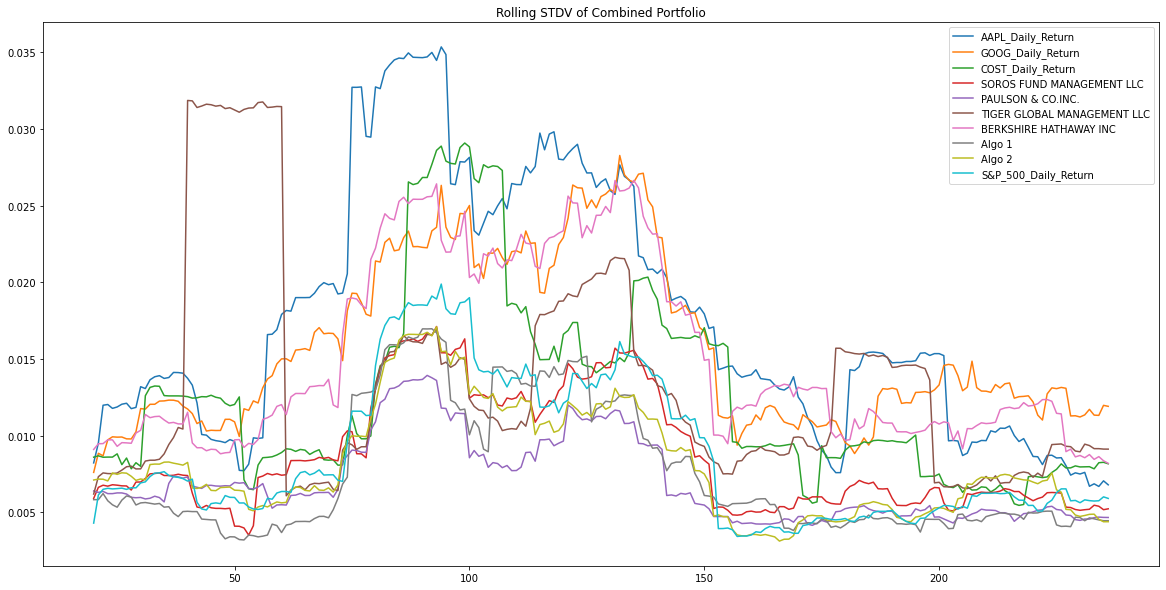

In [417]:
combined_df.rolling(window=21).std().plot(figsize=(20, 10), title='Rolling STDV of Combined Portfolio')

### Calculate and plot the correlation

In [418]:
# Calculate and plot the correlation

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [419]:
# Calculate and plot Beta

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [420]:
# Calculate Annualzied Sharpe Ratios

In [421]:
# Visualize the sharpe ratios as a bar plot

### How does your portfolio do?

Write your answer here!